İki Örneklem Oran Testi

İki Oran arasında karşılaştırma yapmak için kullanılır.

İş Uygulaması: Kullanıcı Arayüzü Testi(AB Testi)

Kırmızı Buton mu? Yeşil Buton mu ? 

H0 : P1 <= P2       H1 : P1 > P2

In [32]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import pandas as pd

In [33]:
from statsmodels.stats.proportion import proportions_ztest

In [34]:
basari_sayisi = np.array([300,250])
gozlem_sayilari = np.array([1000,1100])

In [35]:
proportions_ztest(count = basari_sayisi,nobs = gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

HO reddedilir HO : Websitemizde tasarlamış olduğumuz 1.buton renginin dönüşüm oranı ile 2.buton renginin dönüşüm oranı arasında fark yoktur.Yeşil buton lehindedir.

------------------------------------------------------------------------------------------------

Varyans Analizi

İki ya da daha fazla grup ortalaması arasında istatiksel olarak anlamlı bir farklılık olup olmadığını öğrenilmek istenildiğinde kullanılır.

H0 : Mü1 == Mü2 == Mü3     H1 : eşit değiller(en az birisi farklı)

Varsayımlar : 

-Gözlemlerin Birbirinden farklı olması(grupların)

-Normal Dağılım

-Varyans Homojenliği

In [36]:
import numpy as np
import pandas as pd
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31])
B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28])
C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40])
dfs = [A,B,C]
ABC = pd.concat(dfs,axis = 1)
ABC.columns = ["A","B","C"]
ABC.head()

,A,B,C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


Varsayım Kontrolü

In [37]:
from scipy.stats import shapiro
import scipy.stats as stats

In [38]:
shapiro(ABC["A"])

ShapiroResult(statistic=0.977165162563324, pvalue=0.8526773452758789)

shapiro(ABC.B)

In [39]:
shapiro(ABC.C)

ShapiroResult(statistic=0.9604302644729614, pvalue=0.4721103310585022)

In [40]:
stats.levene(ABC.A,ABC.B,ABC.C)

LeveneResult(statistic=0.9446786090621706, pvalue=0.3939978753114075)

Varyanslar homojendir(H0) reddedilemez.

Hipotez Testinin Uygulanması

In [41]:
from scipy.stats import f_oneway

In [42]:
f_oneway(ABC.A,ABC.B,ABC.C)

F_onewayResult(statistic=53.46714172604916, pvalue=1.566295188711795e-14)

In [43]:
print('{:.5f}'.format(f_oneway(ABC.A,ABC.B,ABC.C)[1]))

0.00000


H0 : Bütün içerik oluşturma modellerinin tıklanma alma sayısı arasında istatistiki olarak anlamlı bir fark yoktur. H0 reddedilir.Anlamlı bir fark vardır.

In [44]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
A,23.0,29.956522,2.184205,25.0,28.5,30.0,31.0,34.0
B,23.0,31.869565,2.701924,27.0,30.0,31.0,34.0,38.0
C,23.0,37.521739,2.810202,33.0,35.0,38.0,39.5,43.0


In [45]:
import seaborn as sns

In [46]:
AYRIK = pd.concat([A,B,C], axis = 1)
AYRIK.columns = ["A","B","C"]
print("'AYRIK' Veri Seti: \n\n", AYRIK.head())
 
GRUPA = np.arange(len(A))
GRUPA = pd.DataFrame(GRUPA)
GRUPA[:] = "A"
A =pd.concat([A,GRUPA],axis = 1)
 
 
 
GRUPB = np.arange(len(B))
GRUPB = pd.DataFrame(GRUPB)
GRUPB[:] = "B"
B = pd.concat([B,GRUPB],axis = 1)
 
 
 
GRUPC = np.arange(len(C))
GRUPC = pd.DataFrame(GRUPC)
GRUPC[:] = "C"
C = pd.concat([C,GRUPC],axis = 1)
 
 
BIRLIKTE = pd.concat([A,B,C])
BIRLIKTE
 
BIRLIKTE.columns = ["SÜRELER", "A-B-C"]
print("'BIRLIKTE' Veri Seti \n\n,",BIRLIKTE.head(),"\n") 

'AYRIK' Veri Seti: 

     A   B   C
0  28  31  40
1  33  32  33
2  30  30  38
3  29  30  41
4  28  33  42
'BIRLIKTE' Veri Seti 

,    SÜRELER A-B-C
0       28     A
1       33     A
2       30     A
3       29     A
4       28     A 



<AxesSubplot:xlabel='A-B-C', ylabel='SÜRELER'>

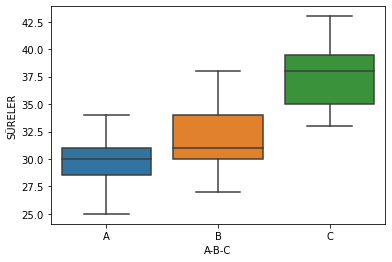

In [47]:
sns.boxplot(x = "A-B-C",y = "SÜRELER",data = BIRLIKTE)

Nonparametrik Hipotez Testi

In [48]:
from scipy.stats import kruskal

In [49]:
kruskal(ABC.A,ABC.B,ABC.C)

KruskalResult(statistic=41.41835051661897, pvalue=1.014190318754816e-09)

H0 reddedilir.Gruplar arasında istatistiki olarak anlamlı bir fark vardır.